In [1]:
import pandas as pd
data=pd.read_csv('danawa_crawling_result.csv')
data.head()

,상품명,스펙 목록,가격
0,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,458920
1,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",48360
2,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1047800
3,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 220W / [구성] 바닥 / 솔...,539990
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63330


### 1. 회사명, 모델명 정리

In [21]:
company_list=[]
product_list=[]
for title in data['상품명']:
    title_info=title.split(' ', 1)
    print(title_info)
    company_name=title_info[0]
    product_name=title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

['삼성전자', '비스포크 제트 VS20A956A3']
['베이스어스', '차량용 청소기 A3 (해외구매)']
['LG전자', '오브제컬렉션 코드제로 A9S AU9982']
['삼성전자', '비스포크 제트 VS20B956AX']
['샤오미', 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)']
['일렉트로룩스', '에르고라피도 ZB3512IG']
['LG전자', '코드제로 A9S AT9200BA']
['삼성전자', '제트 VS20T92K3QD']
['삼성전자', '비스포크 제트 VS20A956AVW']
['오아', '클린듀얼 차량용 청소기 OCL-028BK']
['다이슨', 'V10 앱솔루트']
['샤오미', '드리미 V10']
['벤딕트', '차량용 핸디 무선 청소기 VDT-031']
['LG전자', '오브제컬렉션 코드제로 A9S AU9882']
['삼성전자', '비스포크 제트 VS20B957D4']
['지엔앰주식회사', '콜튼 차량용 무선 청소기 에어건 3세대 CT30']
['아이닉', 'NEW i20']
['다이슨', 'V10 플러피 오리진']
['삼성전자', '비스포크 제트 VS20B956D5']
['샤오미', 'LYDSTO 차량용 무선 청소기 H2 (해외구매)']
['삼성전자', '비스포크 제트 VS20A957D2']
['샤오미', '미지아 차량용 핸디 무선 청소기 (해외구매)']
['LG전자', '오브제컬렉션 코드제로 A9S AT9201WB']
['LG전자', '오브제컬렉션 코드제로 A9S AU9602WD']
['리하스', '차량용 미니 무선 청소기 TEB-4120']
['로엘', '듀스핀3 PRO']
['삼성전자', '비스포크 제트 VS20B957E5']
['샤오미', '미지아 차량용 핸디 무선 청소기']
['삼성전자', '비스포크 제트 VS20B956BUE']
['LG전자', '오브제컬렉션 코드제로 A9S AO9571']
['다이슨', 'Gen5 디텍트™ 컴플리트']
['LG전자', '코드제로 A9S AS9271']
['오토코스',

### 2. 스펙목록에서 카테고리 사용시간, 흡입력을 추출

In [26]:
spec_list=data['스펙 목록'][0].split(' / ')
spec_list

['핸디스틱청소기',
 '무선형',
 '흡입전용',
 '흡입력: 210W',
 '[구성] 바닥',
 '솔형',
 '틈새',
 '연장툴',
 '청정스테이션',
 '[배터리] 분리형 (1개)',
 '충전시간: 3시간30분',
 '사용시간(개당): 1시간',
 '[성능] 디지털인버터모터',
 '5단계여과',
 '[기능] 물걸레(별도구매)',
 '디스플레이표시창',
 '자동물공급',
 '배터리잔량표시',
 '자동먼지비움',
 '[부가] 먼지통용량: 0.5L',
 '물통용량: 0.15L',
 '색상: 미드나잇블루',
 '무게: 2.5kg',
 '액세서리크래들 ',
 '크기(가로x세로x깊이): 250x930x202mm']

In [27]:
# 카테고리 정보를 추출
category=spec_list[0]
category

'핸디스틱청소기'

In [28]:
# 사용시간, 흡입력이 포함된 원소 추출
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec=spec
    elif '흡입력' in spec:
        suction_spec=spec
        
print(use_time_spec)
print(suction_spec)

사용시간(개당): 1시간
흡입력: 210W


In [29]:
use_time_value=use_time_spec.split(' ')[1].strip()
use_time_value

'1시간'

In [30]:
suction_value=suction_spec.split(' ')[1].strip()
suction_value

'210W'

In [34]:
# 카테고리, 사용시간, 흡입력 추출
category_list=[]
use_time_list=[]
suction_list=[]
for spec_data in data['스펙 목록']:
    spec_list=spec_data.split(' / ')
    category=spec_list[0]
    category_list.append(category)
    
    # 사용시간, 흡입력 추출
    use_time_value=None
    suction_value=None
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value=spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value=spec.split(' ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [35]:
print("카테고리:",len(category_list), category_list[0:5])
print("사용시간:",len(use_time_list), use_time_list[0:5])
print("흡입력:",len(suction_list), suction_list[0:5])

카테고리: 400 ['핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기', '차량용청소기']
사용시간: 400 ['1시간', '45분', '1시간', '1시간', '30분']
흡입력: 400 ['210W', '15,000Pa', '220W', '220W', '16,800Pa']


### 3. 무선청소기 사용시간 단위 통일

In [36]:
# 40분 -> 40, 3시간30분 -> 210
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour=time.split('시간')[0] # 3시간 30분 -> 3
            if '분' in time:
                minute=time.split('시간')[-1].split('분')[0] # 3시간 30분 -> 30분 -> 30
            else:
                minute=0 # 1시간 -> 0분
        else:
            hour=0
            minute=time.split('분')[0]
        return int(hour)*60+int(minute)
    except:
        return None

In [37]:
# 함수 동작 테스트
times=['40분','4분','1시간','3시간30분','4시간']
for time in times:
    time_value=convert_time_minute(time)
    print(time,'=',time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [38]:
# 모델별 사용시간을 분단위로 통일
new_use_time_list=[]
for time in use_time_list:
    value=convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

400
[60, 45, 60, 60, 30, 35, 60, 60, 60, 25]


### 4. 무선 청소기 흡입력 단위 통일

In [41]:
# w를 지우고 100을 나눠 pa로 통일
def get_suction(value):
    try:
        value=value.upper()
        if 'AW' in value or 'W' in value:
            result=value.replace('A','').replace('W','')
            result=int(result.replace(',',''))
        elif 'PA' in value:
            result=value.replace('PA','')
            result=int(result.replace(',',''))/100
        else:
            result=None
        return result
    except:
        return None

In [42]:
# 흡입력 단위 통일시키기
new_suction_list=[]
for power in suction_list:
    value=get_suction(power)
    new_suction_list.append(value)
    
print(len(new_suction_list))
print(new_suction_list[0:10])

400
[210, 150.0, 220, 220, 168.0, None, 200, 200, 210, None]


### 5. 전처리 결과를 엑셀로 저장

In [43]:
pd_data=pd.DataFrame()
pd_data['카테고리']=category_list
pd_data['회사명']=company_list
pd_data['제품']=product_list
pd_data['가격']=data['가격']
pd_data['사용시간']=new_use_time_list
pd_data['흡입력']=new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,458920,60.0,210.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),48360,45.0,150.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1047800,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),63330,30.0,168.0


In [44]:
pd_data.to_csv('result_preprocessing.csv', index=False)

In [45]:
pd_data['카테고리'].value_counts()

핸디스틱청소기    270
차량용청소기     120
물걸레청소기      10
Name: 카테고리, dtype: int64

In [46]:
pd_data_final=pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
len(pd_data_final)

270

In [47]:
pd_data_final['가격'].unique() # '가격비교예정'을 제거하기 위해 unique

array([ 458920, 1047800,  539990,  160080,  576860,  359980,  439060,
        468880,  157730, 1035470,  719770,  179000,  484930,  619510,
        607990,  664210,  840960,  764880,  565910,  928790, 1320150,
        573130,  691070,  870290, 1108360,  521320,  179200], dtype=int64)

In [48]:
# 만약 '가격비교예정' 데이터가 있으면 상품을 제외
cond=pd_data_final['가격']!='가격비교예정'
pd_data_final=pd_data_final[cond]
pd_data_final

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,458920,60.0,210.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1047800,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
5,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
6,핸디스틱청소기,LG전자,코드제로 A9S AT9200BA,576860,60.0,200.0
...,...,...,...,...,...,...
393,핸디스틱청소기,LG전자,코드제로 A9S AT9271,691070,60.0,210.0
396,핸디스틱청소기,다이슨,V12 디텍트 슬림 컴플리트,870290,60.0,150.0
397,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9972,1108360,60.0,220.0
398,핸디스틱청소기,LG전자,코드제로 A9S AS9200BA,521320,60.0,200.0


In [49]:
pd_data_final.to_csv('2_result_preprocessing.csv', index=False)

### 6. 흡입력 기준 정렬

In [50]:
top_list=pd_data_final.sort_values(['흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
216,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
296,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
56,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
256,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
336,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
...,...,...,...,...,...,...
330,핸디스틱청소기,다이슨,V10 앱솔루트,468880,60.0,NaN
359,핸디스틱청소기,일렉트로룩스,WELL Q6 WQ61-1EDB,179200,45.0,NaN
365,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
370,핸디스틱청소기,다이슨,V10 앱솔루트,468880,60.0,NaN


In [51]:
pd_data_final.isnull().sum()

카테고리     0
회사명      0
제품       0
가격       0
사용시간     0
흡입력     30
dtype: int64

In [52]:
top_list=pd_data_final.sort_values(['사용시간'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
30,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
190,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
70,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
350,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
150,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
...,...,...,...,...,...,...
325,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
365,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
205,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
5,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN


In [53]:
top_list=pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
30,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
70,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
110,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
150,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
190,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
...,...,...,...,...,...,...
205,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
245,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
285,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN
325,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,NaN


In [55]:
# 평균값 정리
price_mean_value=pd_data_final['가격'].mean()
suction_mean_value=pd_data_final['흡입력'].mean()
use_time_mean_value=pd_data_final['사용시간'].mean()
print('가격 평균값', price_mean_value)
print('흡입력 평균값', suction_mean_value)
print('사용시간 평균값', use_time_mean_value)

가격 평균값 625342.2222222222
흡입력 평균값 213.875
사용시간 평균값 58.51851851851852


In [56]:
# 가성비 좋은 제품 탐색
# 가격이 평균보다 작고 흡입력과 사용시간이 평균보다 높은 제품
condition_data=pd_data_final[(pd_data_final['가격']<=price_mean_value) & 
                             (pd_data_final['흡입력']>=suction_mean_value) & 
                             (pd_data_final['사용시간']>=use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
11,핸디스틱청소기,샤오미,드리미 V10,157730,60.0,220.0
18,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956D5,619510,60.0,220.0
28,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956BUE,565910,60.0,220.0
43,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
51,핸디스틱청소기,샤오미,드리미 V10,157730,60.0,220.0
58,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956D5,619510,60.0,220.0
68,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956BUE,565910,60.0,220.0
83,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
91,핸디스틱청소기,샤오미,드리미 V10,157730,60.0,220.0


### 7. 데이터 시각화

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
chart_data=pd_data_final.dropna(axis=0)
len(chart_data)

240

In [59]:
# 흡입력, 사용기간의 최대값/최소값 정리
suction_max_value=chart_data['흡입력'].max()
suction_mean_value=chart_data['흡입력'].mean()
use_time_max_value=chart_data['사용시간'].max()
use_time_mean_value=chart_data['사용시간'].mean()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54001 (\N{HANGUL SYLLABLE TIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) mis

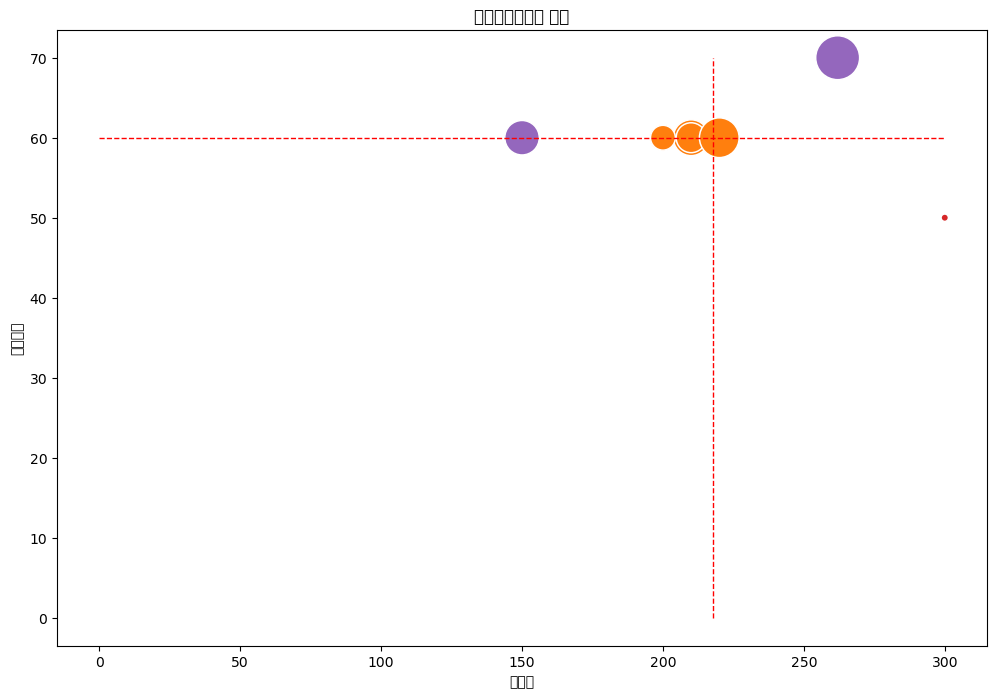

In [66]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("행디스틱청소기 차트")
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue=chart_data['회사명'],
               data=chart_data, sizes=(10,1000), legend=False)
plt.plot([0,suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value],
        [0, use_time_max_value],
        'r--', lw=1)
plt.show()


### 8. 인기 제품 데이터 시각화

In [61]:
chart_data_selected=chart_data[:20]
len(chart_data_selected)

20

In [62]:
suction_max_value=chart_data_selected['흡입력'].max()
suction_mean_value=chart_data_selected['흡입력'].mean()
use_time_max_value=chart_data_selected['사용시간'].max()
use_time_mean_value=chart_data_selected['사용시간'].mean()

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54001 (\N{HANGUL SYLLABLE TIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjoeun\a

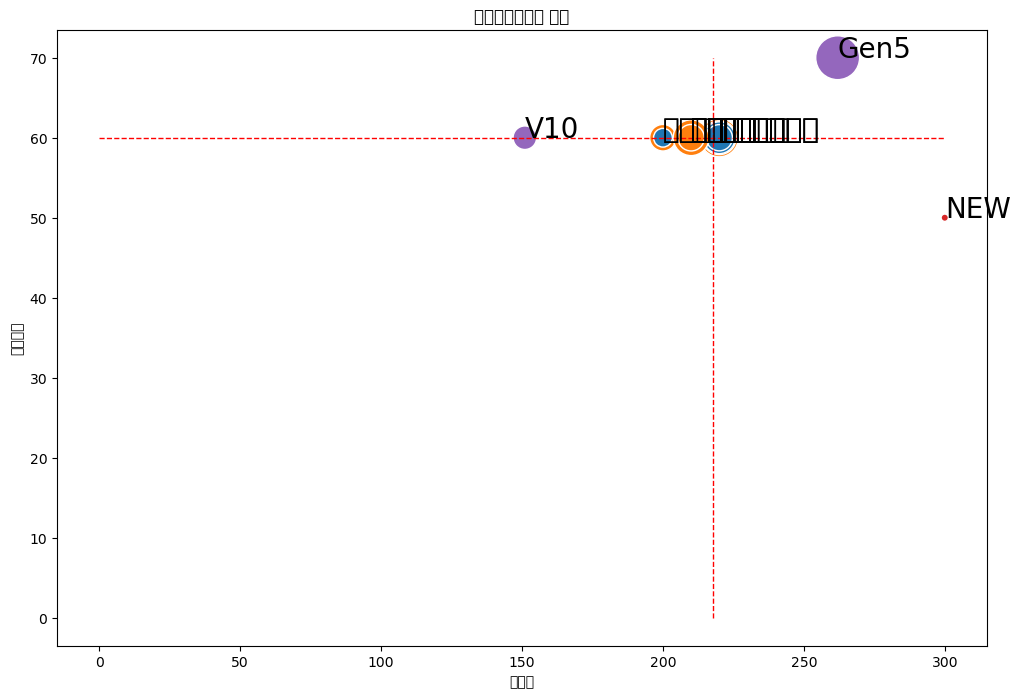

In [67]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("행디스틱청소기 차트")
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue=chart_data_selected['회사명'],
               data=chart_data_selected, sizes=(10,1000), legend=False)
plt.plot([0,suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value],
        [0, use_time_max_value],
        'r--', lw=1)

for index, row in chart_data_selected.iterrows():
    x=row['흡입력']
    y=row['사용시간']
    s=row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()